In [ ]:
import pandas as pd
import numpy as np
import random

# CSV 파일 불러오기
#df = pd.read_csv("reviews.csv")
#df.head()  # 상위 5개 출력

# 결측치 및 데이터 정보 확인
#print(df.info())
#print(df.isnull().sum())

# 재현 가능성 설정
np.random.seed(42)
random.seed(42)

# 가짜 데이터 생성
n = 200  # 리뷰 수

df = pd.DataFrame({
    'review_id': range(1, n + 1),
    'category': np.random.choice(['electronics', 'fashion', 'books', 'beauty'], size=n),
    'rating': np.random.choice([1, 2, 3, 4, 5], size=n, p=[0.1, 0.15, 0.25, 0.3, 0.2]),
    'review_length': np.random.randint(20, 500, size=n),  # 텍스트 길이
    'sentiment_score': np.round(np.random.uniform(-1, 1, size=n), 2)  # 감성 점수 (-1 ~ 1)
})

# 미리보기
print(df.head())


   review_id     category  rating  review_length  sentiment_score
0          1        books       1            384             0.69
1          2       beauty       4            499            -0.29
2          3  electronics       3            391             0.91
3          4        books       4            369             0.35
4          5        books       5             66            -0.03


        review_id      rating  review_length  sentiment_score
count  200.000000  200.000000     200.000000       200.000000
mean   100.500000    3.410000     261.600000         0.026200
std     57.879185    1.276734     134.778881         0.566212
min      1.000000    1.000000      20.000000        -0.970000
25%     50.750000    2.000000     140.500000        -0.460000
50%    100.500000    4.000000     265.500000         0.040000
75%    150.250000    4.000000     381.000000         0.502500
max    200.000000    5.000000     499.000000         0.990000


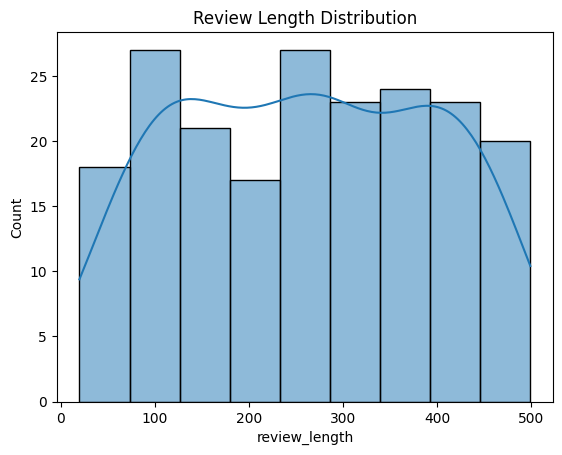

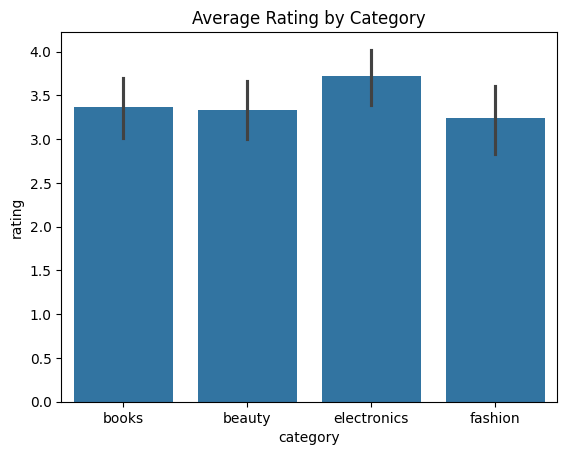

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 기본 통계 요약
print(df.describe())

# 1) 텍스트 길이 분포
sns.histplot(df["review_length"], kde=True)
plt.title("Review Length Distribution")
plt.show()

# 2) 범주(category)별 평균 평점 시각화 (barplot)
sns.barplot(data=df, x="category", y="rating")
plt.title("Average Rating by Category")
plt.show()

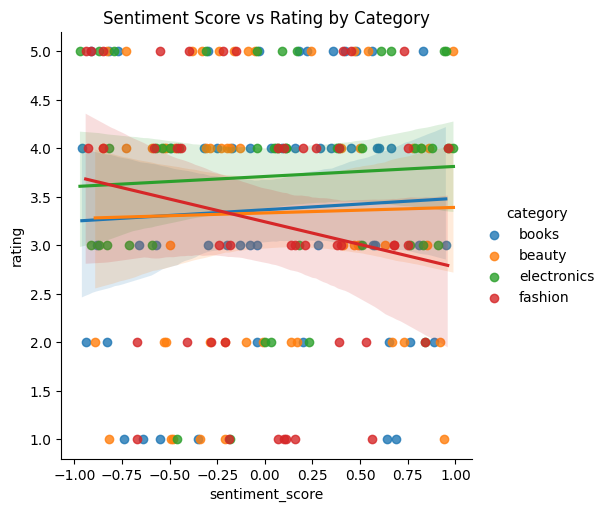

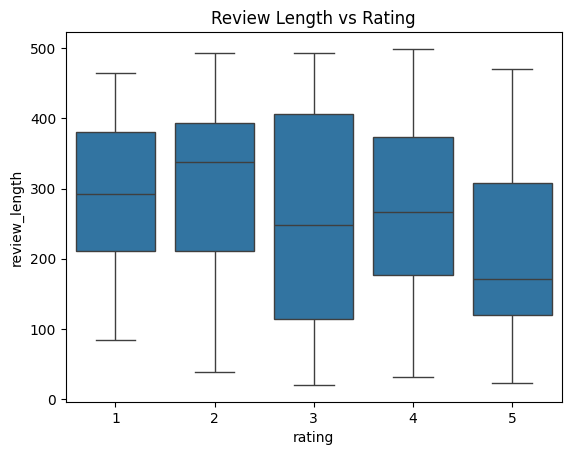

In [5]:
# 3) 감성 점수 vs 평점 (카테고리별 구분)
sns.lmplot(data=df, x="sentiment_score", y="rating", hue="category")
plt.title("Sentiment Score vs Rating by Category")
plt.show()

# 4) 평점과 리뷰 길이 관계 (boxplot)
sns.boxplot(data=df, x="rating", y="review_length")
plt.title("Review Length vs Rating")
plt.show()


인사이트 요약

- `category`에 따라 평균 평점 차이가 존재하며, 특정 카테고리는 전반적으로 낮은 평점을 가짐.
- `sentiment_score`가 높을수록 대체로 높은 평점과 연관되며, 이는 AI 임베딩에서 긍정 감정 표현과 평점 간의 연관성을 시사함.
- `review_length`는 평점과 직접적인 상관관계는 낮지만, 일부 평점에서는 길이가 평균보다 긴 경향이 있음.